<a href="https://colab.research.google.com/github/princeKike27/Life-Expectancy-GDP/blob/main/Life_Expectancy_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy and GDP

For this project I analyzed data on Growth Domestic Product (GDP) and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries. GDP is the total monetary or market value of all the finished goods and services produced within a country's borders in a specific time period. Being a broad measure of overall domestic production, it functions as a comprehensive scorecard of a given country's economic health.

Throughout the project you will be able to find:

* Data cleaning and standardization.
* Analysis of Life Expectancy and GDP from 2000 to 2015.
* Correlation Analysis of Life Expectancy and GDP.




In [58]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/princeKike27/Life-Expctancy-GDP/main/LifeExpe_GDP_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [60]:
# check column types
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [61]:
# check unique countries names
df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

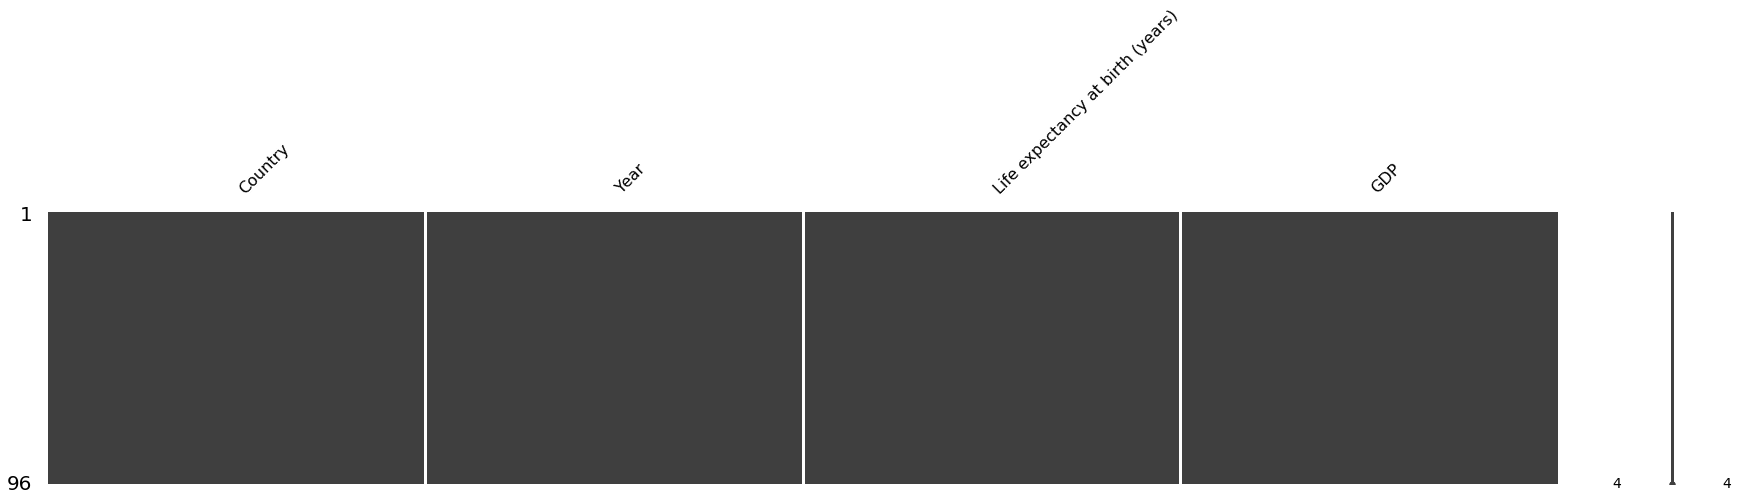

In [62]:
# check for missing values
import missingno as msg

msg.matrix(df, figsize=(30, 5))

In [63]:
# get descriptive statistics
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


# Distribution of Life Expectancy and GDP

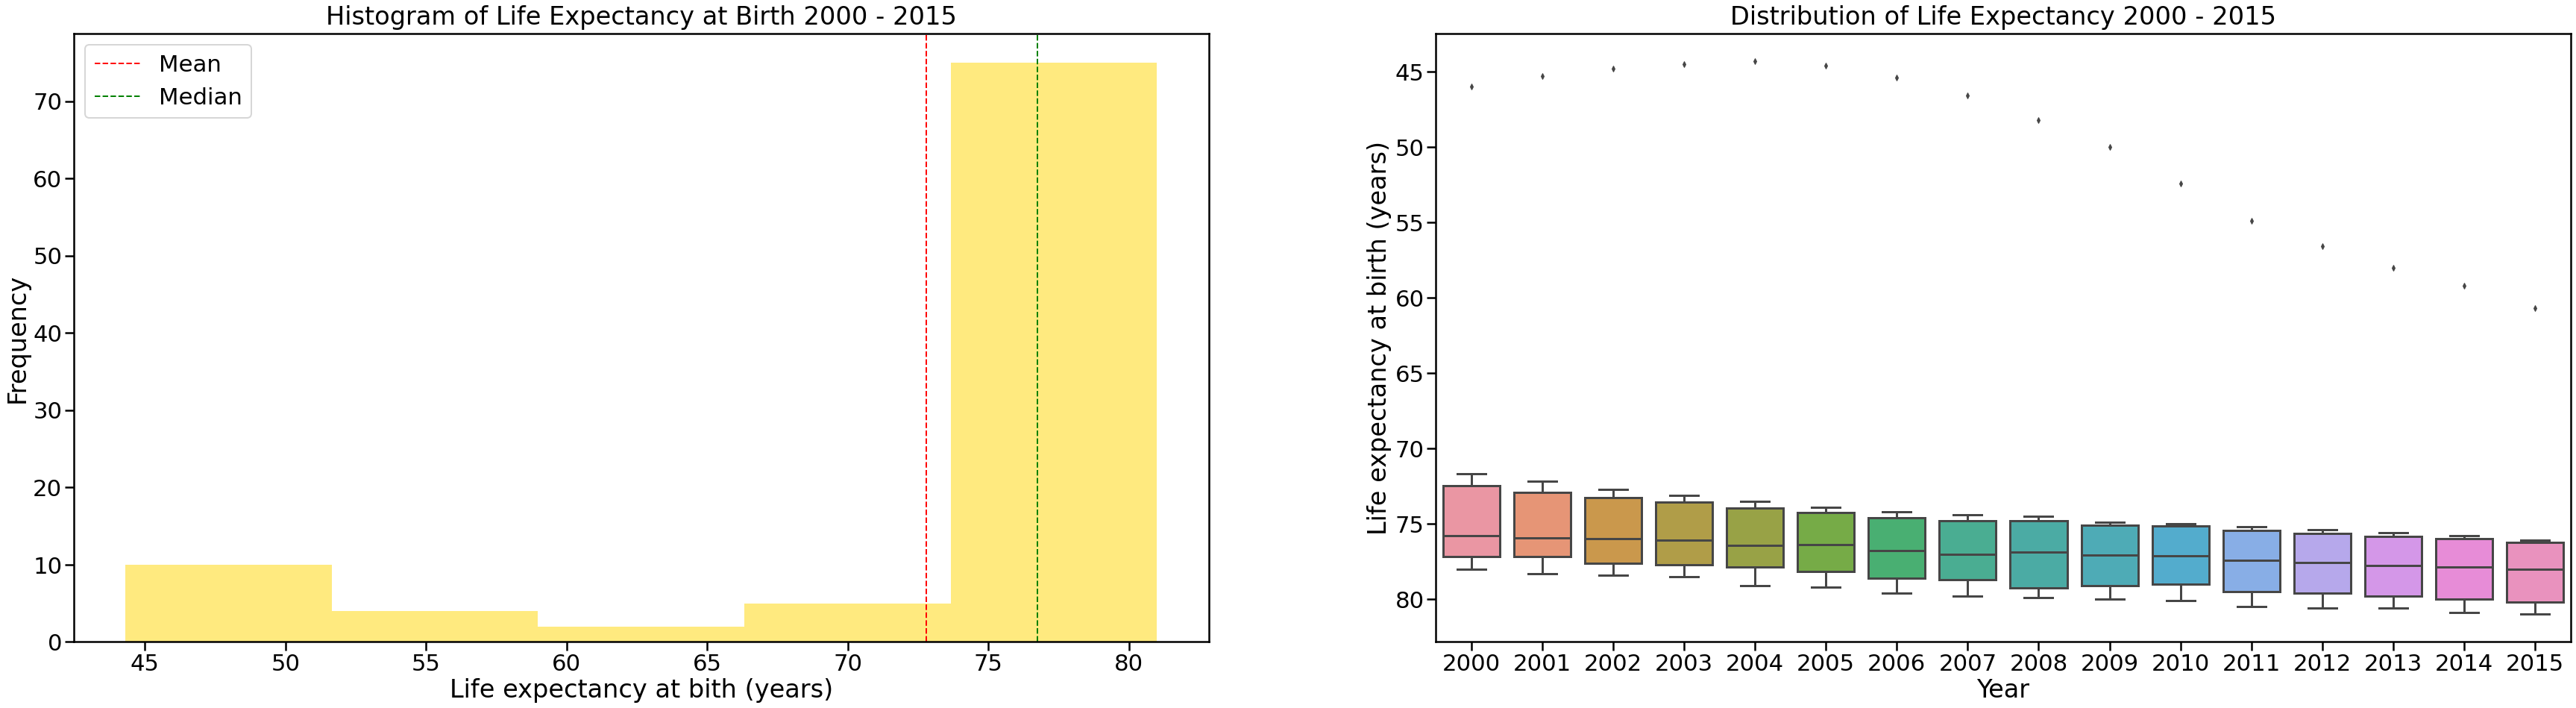

In [86]:
# histogram and boxplot of life exectancy at birth

fig = plt.figure(figsize=(60, 15))

# histogram
ax = plt.subplot(1, 2, 1)
plt.hist(x = df['Life expectancy at birth (years)'], bins=5, color='gold', alpha=0.5)
plt.axvline(df['Life expectancy at birth (years)'].mean(), linewidth=2, linestyle='dashed', label='Mean', color='red')
plt.axvline(df['Life expectancy at birth (years)'].median(), linewidth=2, linestyle='dashed', label='Median', color='green')

plt.xlabel('Life expectancy at bith (years)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Life Expectancy at Birth 2000 - 2015', pad=12)

# violinplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='Year', y='Life expectancy at birth (years)', data=df)
# invert y axis
plt.gca().invert_yaxis()
plt.title('Distribution of Life Expectancy 2000 - 2015', pad=12)

plt.show()



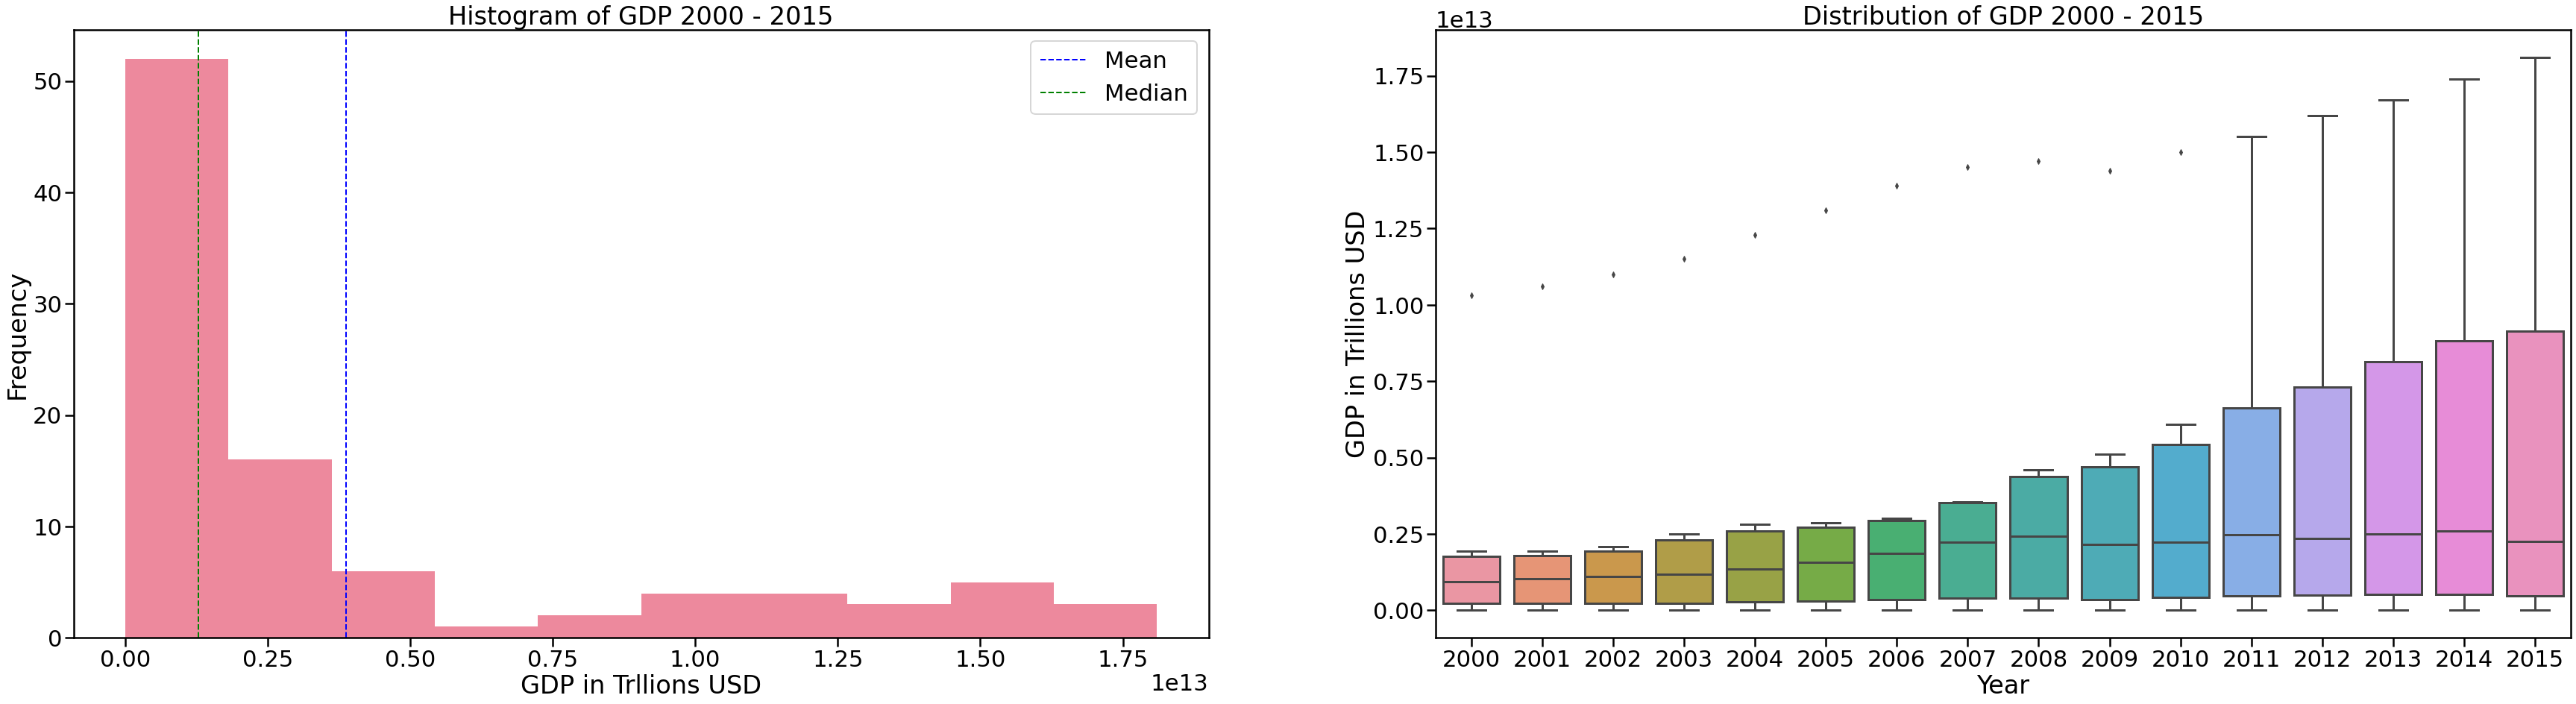

In [85]:
# histogram and boxplot of GDP

fig = plt.figure(figsize=(60, 15))

# histogram
ax = plt.subplot(1, 2, 1)
plt.hist(df['GDP']  , bins=10, color='crimson', alpha=0.5)
plt.axvline(df['GDP'].mean(), linestyle='dashed', linewidth=2, color='blue', label='Mean')
plt.axvline(df['GDP'].median(), linestyle='dashed', linewidth=2, color='green', label='Median')

plt.xlabel('GDP in Trllions USD')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of GDP 2000 - 2015')

# boxplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(x='Year', y='GDP', data=df)

plt.ylabel('GDP in Trillions USD')
plt.title('Distribution of GDP 2000 - 2015')

plt.show()

# Life Expectancy Over the Years

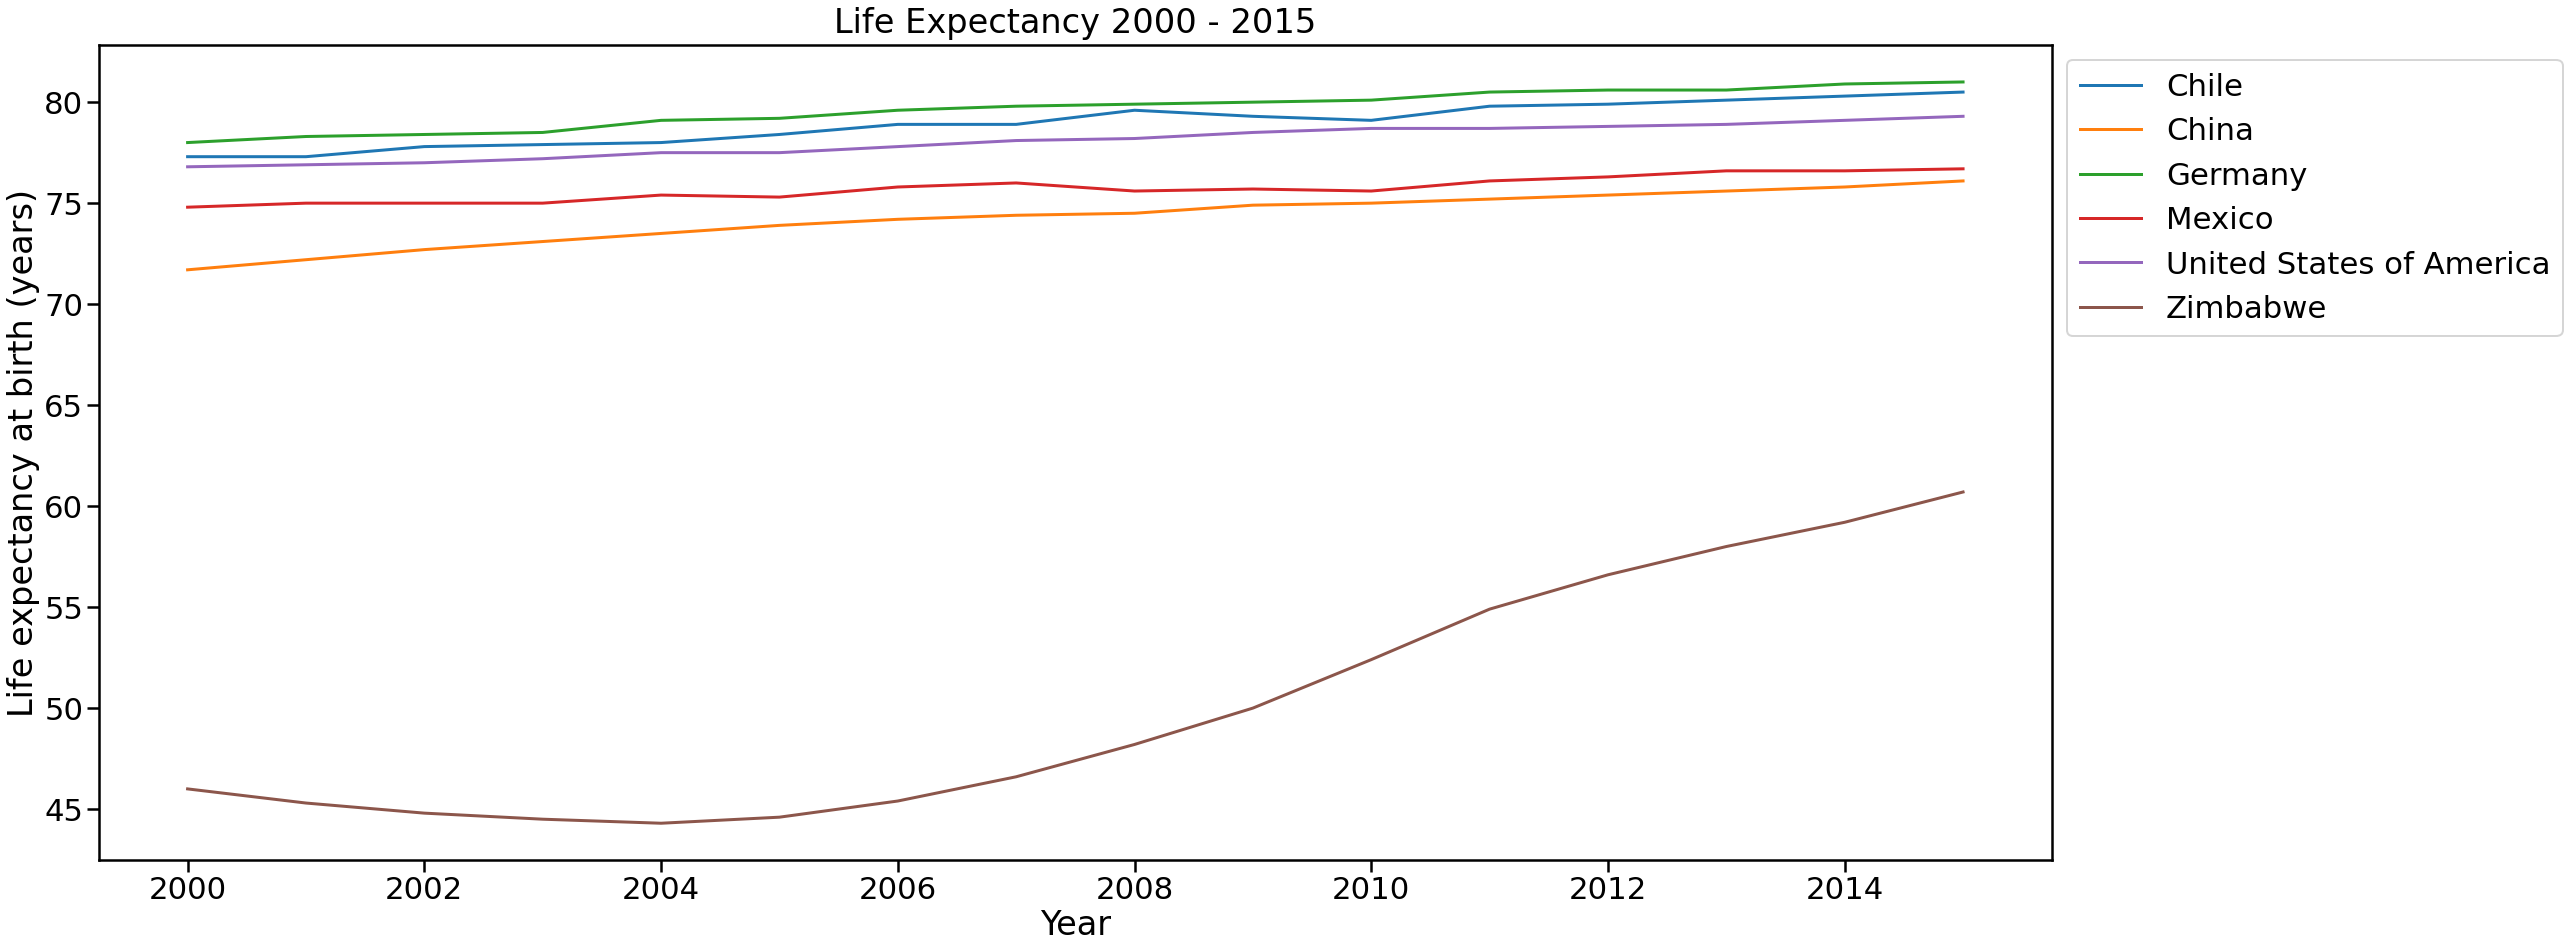

In [91]:
# line plot of life expectancy

f, ax = plt.subplots(figsize=(35, 15))

sns.set_context('poster', font_scale=1.4)
sns.lineplot(x='Year', y='Life expectancy at birth (years)', data=df, hue='Country')

plt.title('Life Expectancy 2000 - 2015', pad=12)
# place legend outside plot
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


- Zimbabwe has had the greatest change in life expectancy throught the years with a 29% increment in 15 years. In 2015 people live on average 14 years more than in 2000.
- Germany and Chile have increased 3.8% (4 years) and 4.5% (3 years)respectively the average life expectancy of their population in 15 years.
- China has passed from an average life expectancy in 2000 of 71 years to 75 in 2015. An increment of 5.6%.

# GDP Over the Years

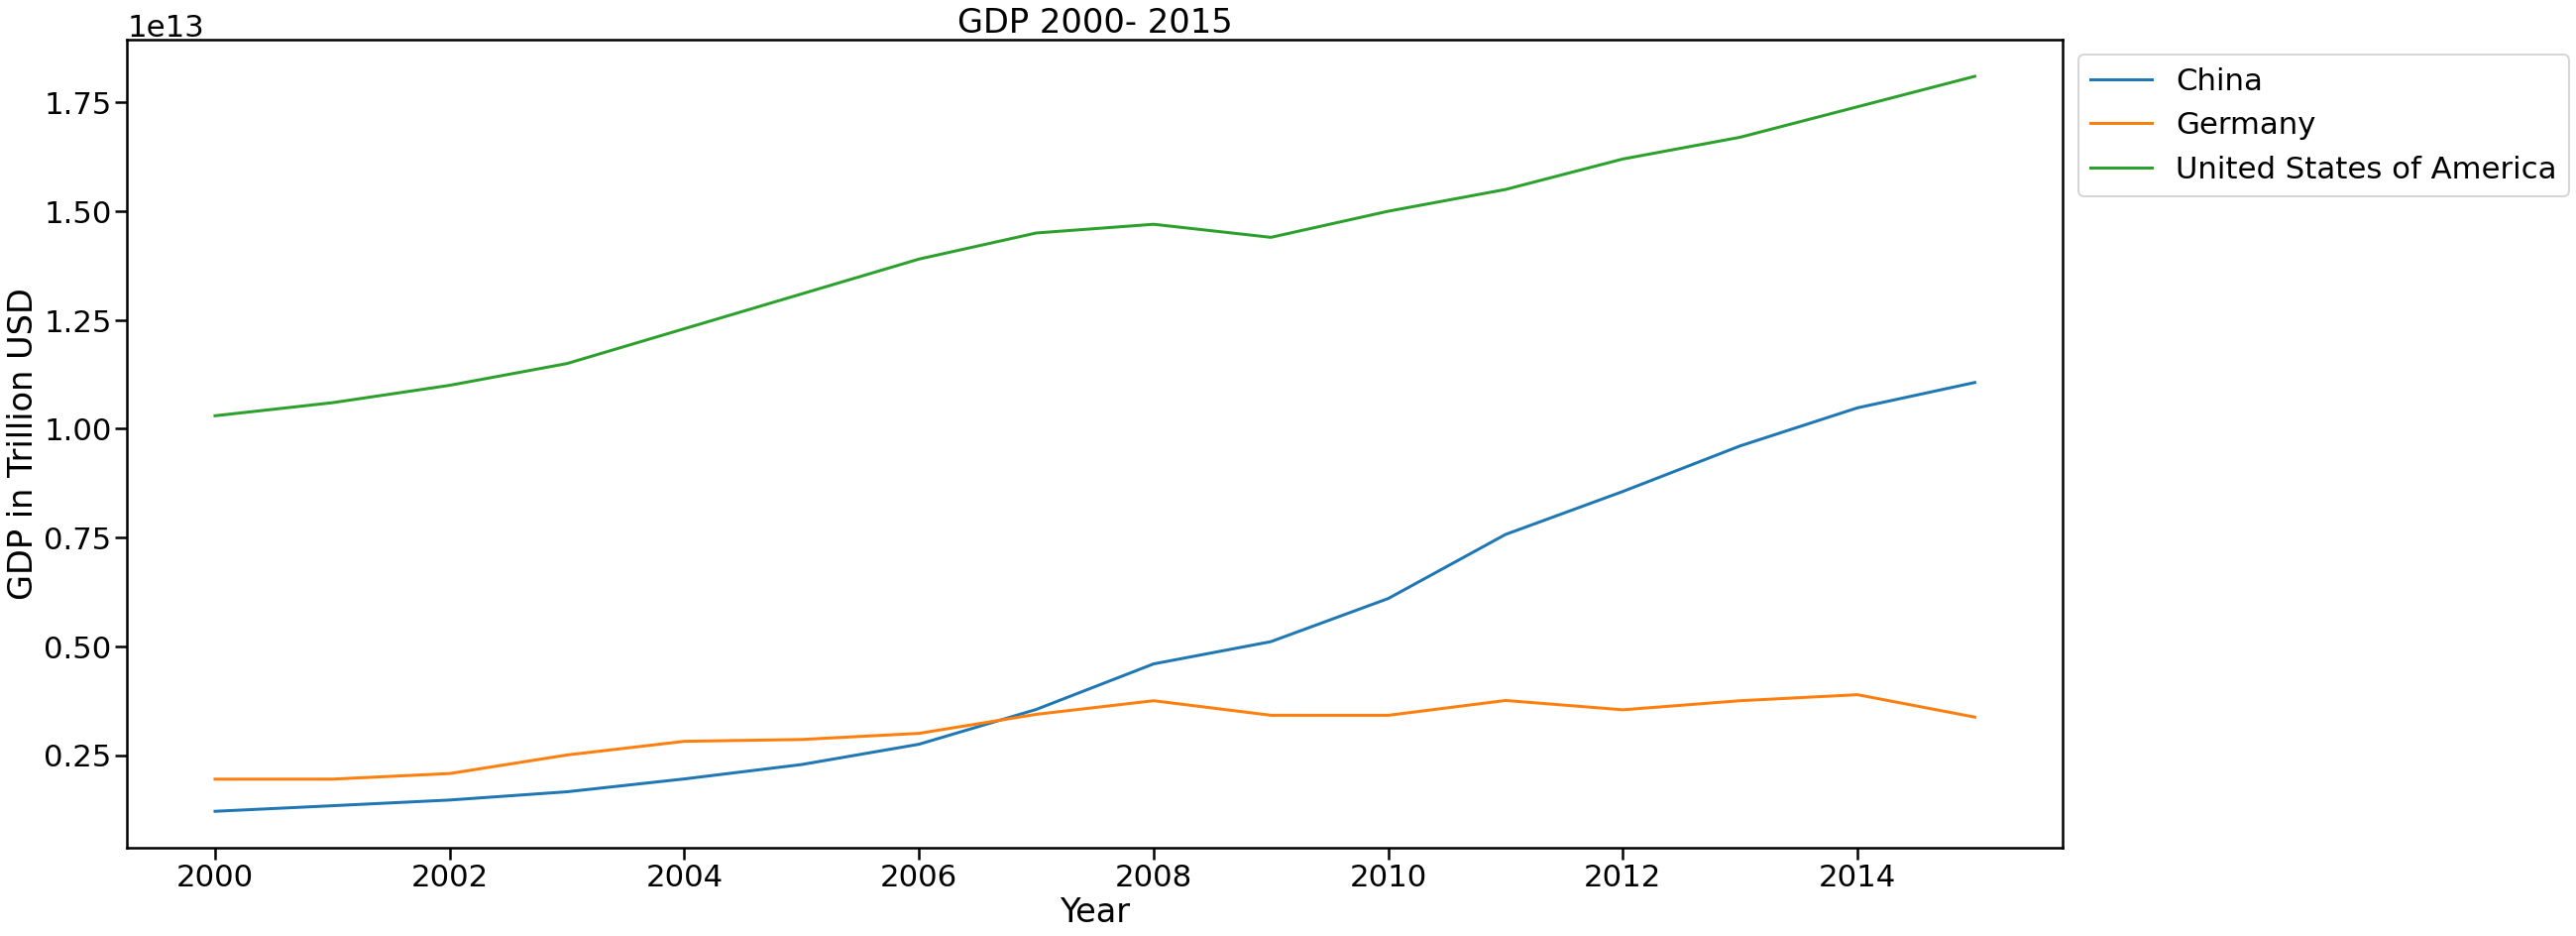

In [90]:
# line plot of GDP - USA, China and Germany

highestGDP_df = df[df['Country'].isin(['United States of America', 'China', 'Germany'])]

f, ax = plt.subplots(figsize=(35, 15))

sns.lineplot(x='Year', y='GDP', data=highestGDP_df, hue='Country')

plt.ylabel('GDP in Trillion USD')
plt.title('GDP 2000- 2015')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

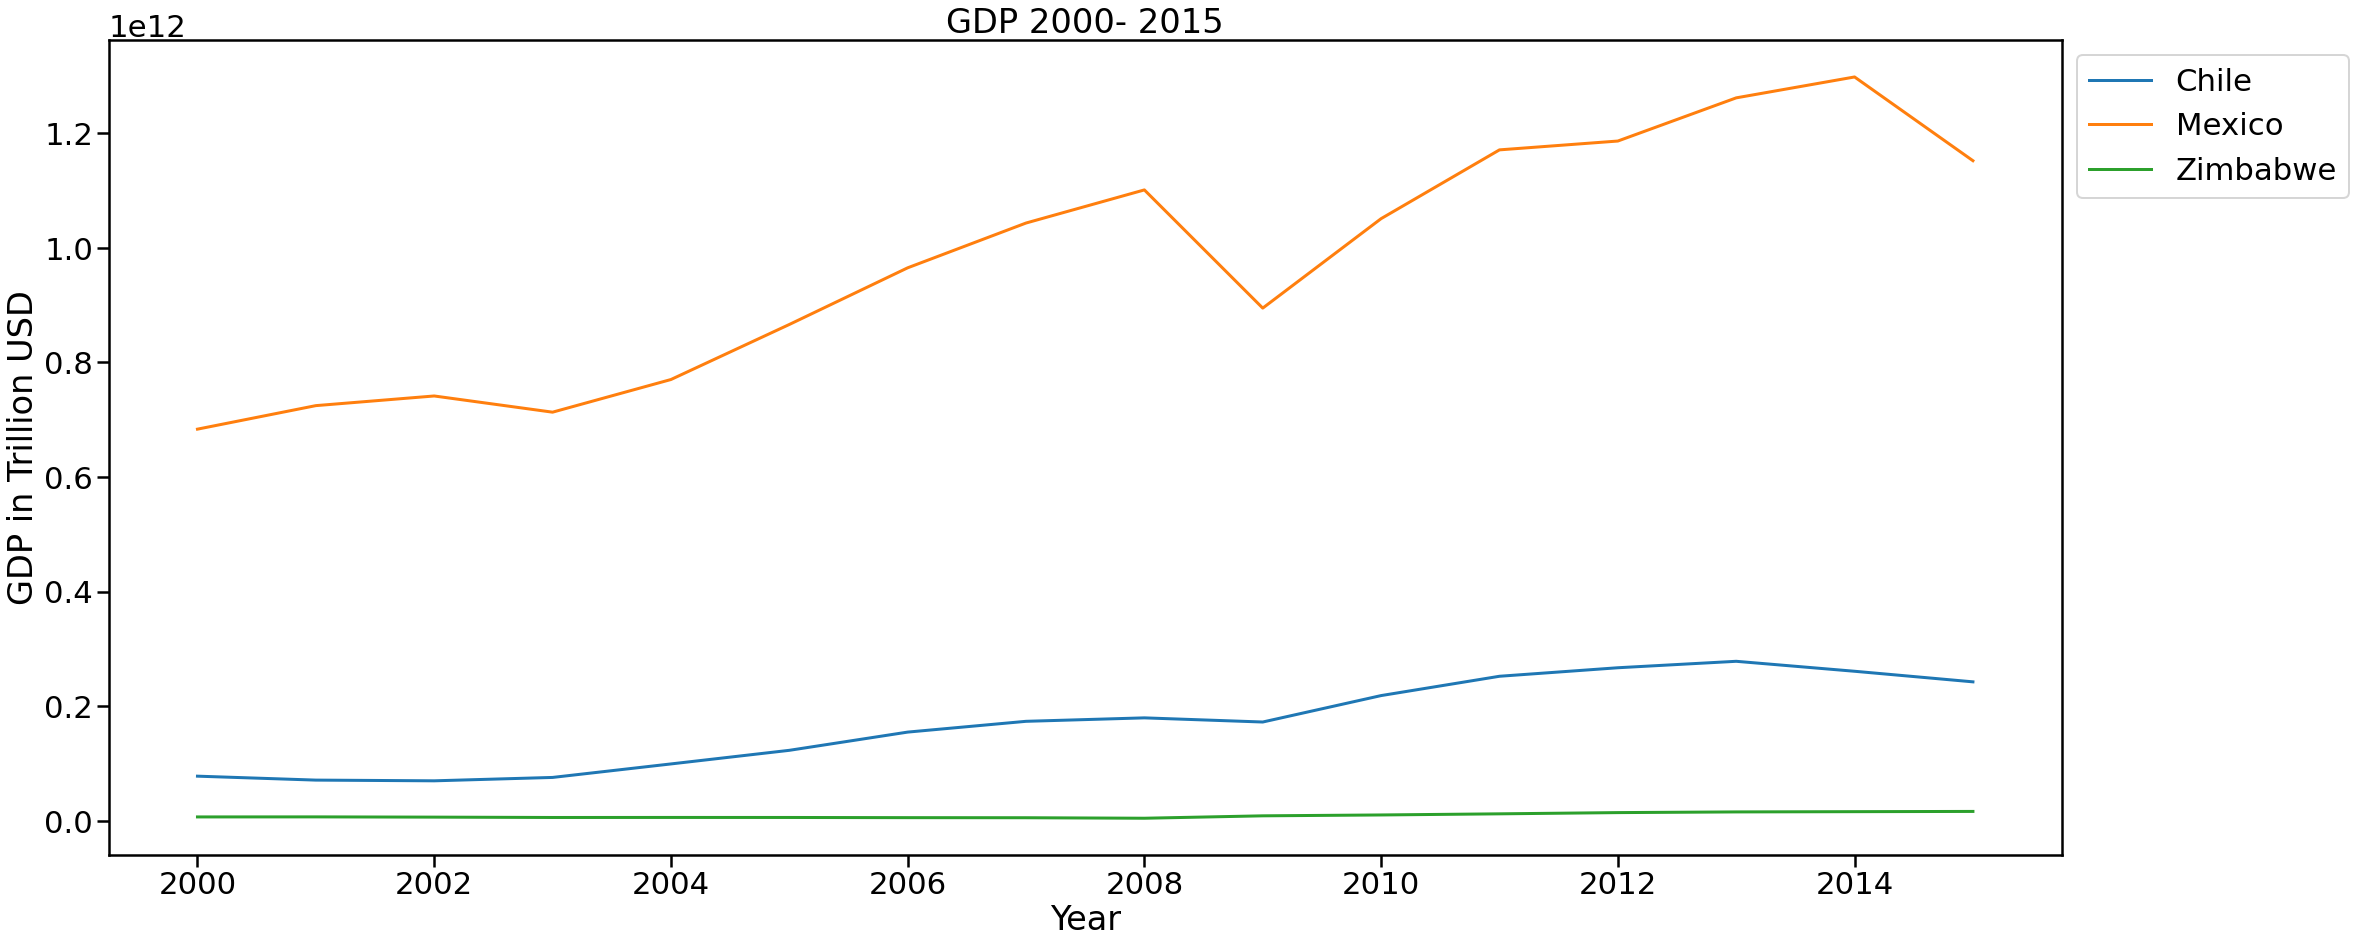

In [102]:
# line plot of GDP - Mexico, Chile and Zimbabwe

lowestGDP_df = df[df['Country'].isin(['Mexico', 'Chile', 'Zimbabwe'])]

f, ax = plt.subplots(figsize=(35, 15))

sns.lineplot(x='Year', y='GDP', data=lowestGDP_df, hue='Country')

plt.ylabel('GDP in Trillion USD')
plt.title('GDP 2000- 2015')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- Zimbabwe has achieved a growth of 142% in its GDP passing from 6.6 billion in 2000 to 16 billion in 2015.
- Chile has achieved a growth of 211% in its GDP passing from 7.7 billion in 2000 to 24 billion in 2015.
- USA during this 15 years has been on top. It has increased its GDP in 75% reaching its maximum in 2015 with 18 trillion USD. It only decline in 2009 due to the economic crisis it suffered in 2008 but it quickly recovered.
- China has had the biggest increment during this period 816% passing from 1.2 trillion USD in 2000 to 11 Trillion USD in 2015. In 2008 it passed Germany and is the second country behind USA.

# Correlation of Numeric Features

In [69]:
# correlation matrix
df.corr()

,Year,Life expectancy at birth (years),GDP
Year,1.000000,0.155050,0.208288
Life expectancy at birth (years),0.155050,1.000000,0.343207
GDP,0.208288,0.343207,1.000000


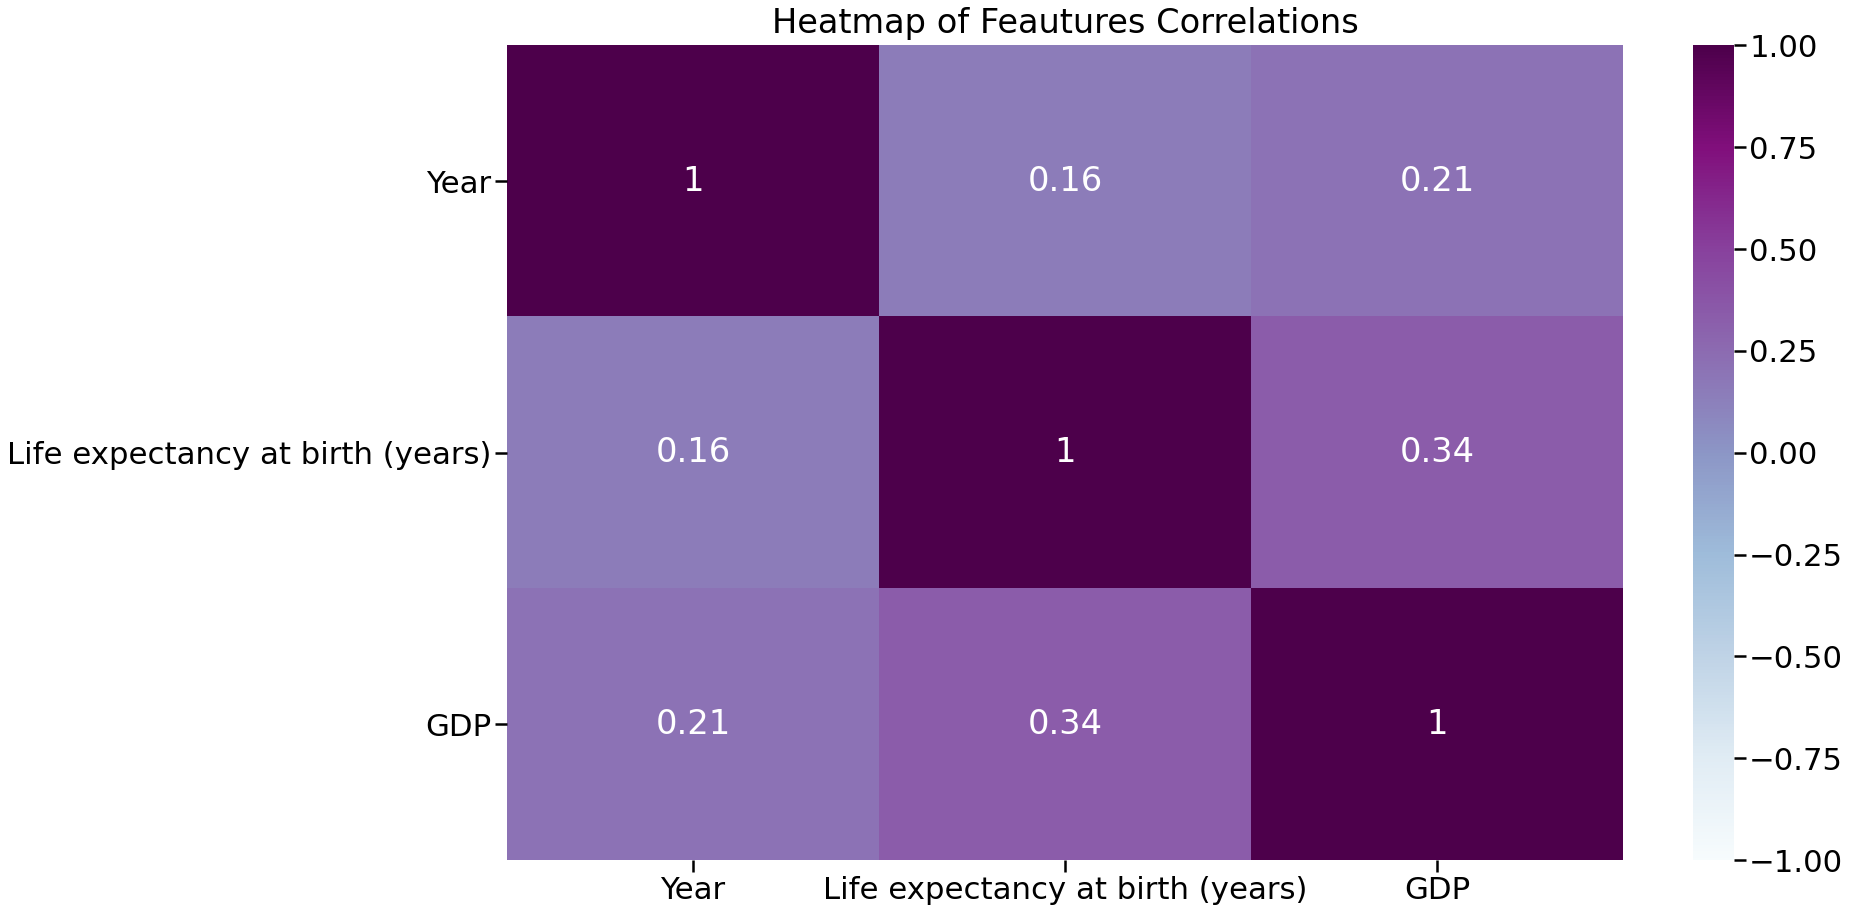

In [75]:
# heatmap of correlations

fig = plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BuPu')

plt.title('Heatmap of Feautures Correlations', pad=12)

plt.show()

# Life Expectancy Vs GDP

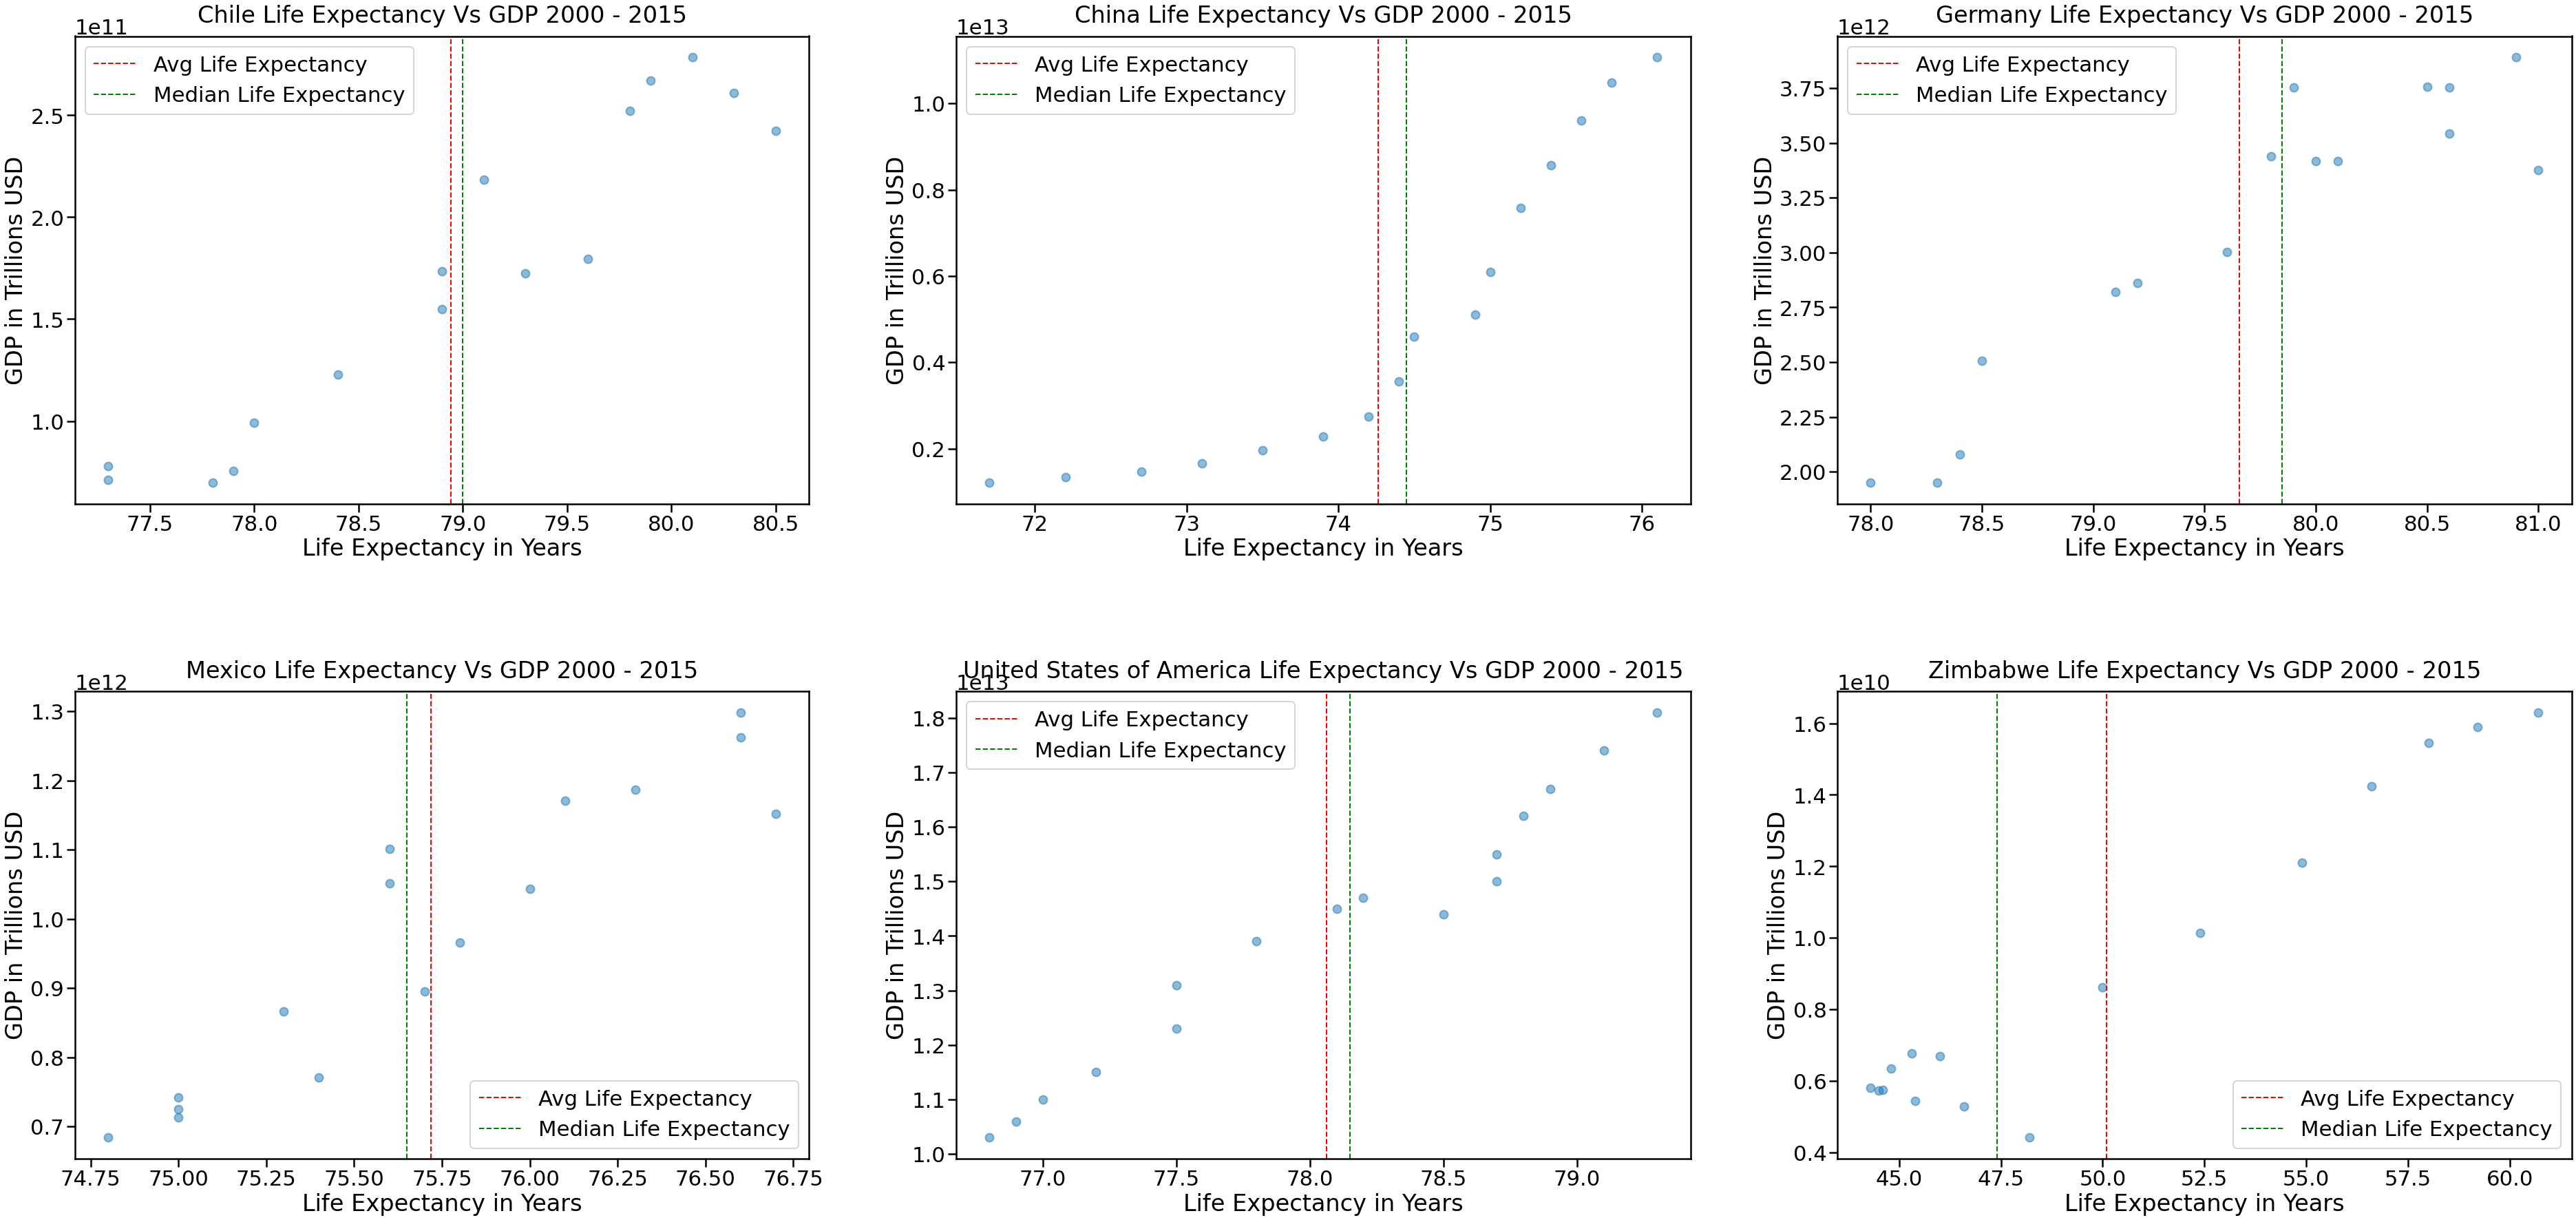

In [104]:
from scipy.stats import pearsonr

# scatter plots of Life Expectancy Vs GDP per country

# list of countries names
countries = list(df['Country'].unique())

# dict to store correlation per country
countries_correlation = {}

fig = plt.figure(figsize=(65, 30))
# adjust vertical space between subplots
plt.subplots_adjust(hspace=0.4)

# variable to store plot position
n = 1

for el in countries:
  # variable to store the current country info
  country_df = df[df.Country == el]

  # calculate correlation of current country
  life_expectancy = country_df['Life expectancy at birth (years)'].values
  GDP = country_df['GDP'].values

  corr, p = pearsonr(life_expectancy, GDP)

  # store correlation of current country 
  countries_correlation[el] = corr

  # scatter plot
  ax = plt.subplot(2, 3, n)
  plt.scatter(country_df['Life expectancy at birth (years)'], country_df['GDP'], alpha=0.5)
  plt.axvline(country_df['Life expectancy at birth (years)'].mean(), linestyle='dashed', linewidth=2, color='red', label='Avg Life Expectancy')
  plt.axvline(country_df['Life expectancy at birth (years)'].median(), linestyle='dashed', linewidth=2, color='green', label='Median Life Expectancy')
  plt.xlabel('Life Expectancy in Years')
  plt.ylabel('GDP in Trillions USD')
  plt.title(f'{el} Life Expectancy Vs GDP 2000 - 2015', pad=20)
  plt.legend()
  # increase plot position
  n += 1

plt.show()


In [72]:
print('Correlation of Life Expectancy Vs GDP per Country 2000 - 2015', '\n')

for el in countries_correlation.items():
  print(el)

Correlation of Life Expectancy Vs GDP per Country 2000 - 2015 

('Chile', 0.9498766659254416)
('China', 0.9085255408648358)
('Germany', 0.9326988982561268)
('Mexico', 0.9322377167847082)
('United States of America', 0.9817092382430257)
('Zimbabwe', 0.9661998955858777)


All 6 countries during the period 2000 to 2015 have Strong Positive Linear Relationships with correlation values greater than 0.9. That means, that as the GDP of a country increases the life expectancy in years of its population will also increase. 

Since GDP is the monetary value of all finished products and services done in a country in a specific period of time, as the GDP increases the country will have more economic assets to invest in the wellbeing of its inhabitants like in health services, job opportunities, quality of life, etc... At the end, this allows the population to live longer.

- Germany has the highest life expectancy with its population living on average 79.6 years.
- Zimbawe has the lowest life expectancy with its population living on average 50 years.
- The lowest correlation between Life Expectancy and GDP is seen on China (0.90). This is due to the fact, that China is the country with the highest population and 35.9% of its 1.3 billion inhabitants lives below the poverty line.